In [75]:
import pylab as pl
import numpy as np
from scipy.io import loadmat
import pdb

In [76]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels

In [77]:
def perceptron_train(X, Y, Xtest, Ytest, iterations=100, eta=.1):
    # initialize accuracy vector
    acc = np.zeros(iterations)
    # initialize weight vector
    weights = np.ones(X.shape[0]) / X.shape[0]
    N = X.shape[1]
    # loop over iterations
    for it in range(1, iterations + 1):
        # pick a random misclassified data point
        i = np.random.randint(N)
        # check if there is misclassified data
        if np.sign(np.dot(weights, X[:, i])) != Y[i]:
            # update weight vector
            weights += (eta / it) * X[:, i] * Y[i]
        # compute accuracy
        acc[it - 1] = np.mean(np.sign(np.dot(weights, Xtest)) == Ytest)

    return weights,acc

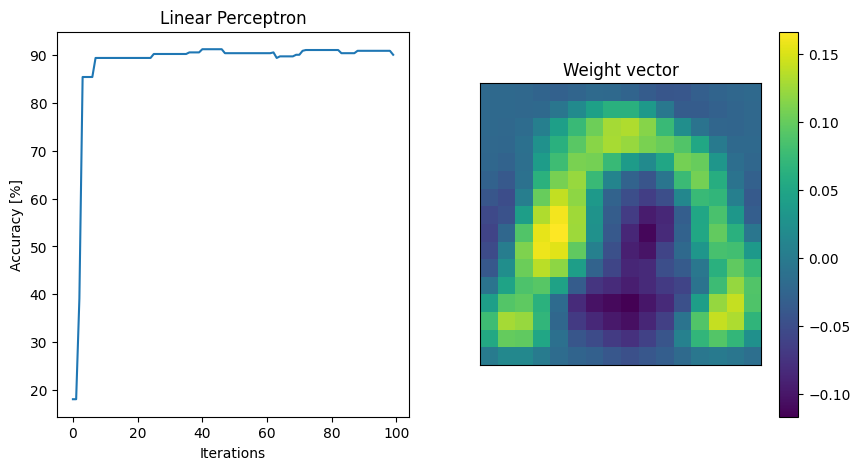

In [78]:
digit = 0
fname = "usps.mat"

imgs, labels = load_data(fname)
# we only want to classify one digit
labels = np.sign((labels[digit, :] > 0) - .5)

# please think about what the next lines do
permidx = np.random.permutation(np.arange(imgs.shape[-1])) # randomly shuffles indices of the data points, ig it is useful for randomly splitting the data (train+test)
trainpercent = 70.
stopat = np.floor(labels.shape[-1] * trainpercent / 100.) # number of data points to be used for training
stopat = int(stopat)

# cut segment data into train and test set into two non-overlapping sets:
X = imgs[:, permidx[:stopat]]
Y = labels[permidx[:stopat]]
Xtest = imgs[:, permidx[stopat:]]
Ytest = labels[permidx[stopat:]]

w,acc_perceptron = perceptron_train(X,Y,Xtest,Ytest)

fig = pl.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(acc_perceptron*100.)
pl.xlabel('Iterations')
pl.title('Linear Perceptron')
pl.ylabel('Accuracy [%]')

# and imshow the weight vector
ax2 = fig.add_subplot(1, 2, 2)
# reshape weight vector
weights = np.reshape(w,(int(np.sqrt(imgs.shape[0])), int(np.sqrt(imgs.shape[0]))))
# plot the weight image
imgh = ax2.imshow(weights)
# with colorbar
pl.colorbar(imgh)
ax2.set_title('Weight vector')
# remove axis ticks
pl.xticks(())
pl.yticks(())

# write the picture to pdf
fname = 'Perceptron_digits-%d.pdf' % digit
pl.savefig(fname)